<a href="https://colab.research.google.com/github/gabcrrstt/Machine-Learning-classifica-o-com-SKLearn/blob/main/Classifica%C3%A7%C3%A3o_com_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diferenciar dois animais com características diferentes: um porco e um cachorro.

In [1]:
!pip install seaborn==0.9.0

In [2]:
#features
# pelo longo
#perna curta
#faz auau
# 1 - sim, 2 - nao
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [1,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

# 1 -> porcon 0 -> cachorro
train_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
train_y = [1,1,1,0,0,0] #labels / etiqueta

#f(x) = y

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(train_x,train_y)

LinearSVC()

In [4]:
animal_misterioso =[1,1,1]


model.predict([animal_misterioso])

array([0])

In [5]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1,misterio2,misterio3]
teste_y = [0,1,1]
previsoes = model.predict(teste_x)

In [6]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print("Taxa de acerto: %.2f " % (taxa_de_acerto * 100))


Taxa de acerto: 100.00 


In [7]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y,previsoes)
print("Taxa de acerto: %.2f " % (taxa_de_acerto * 100))


Taxa de acerto: 100.00 


# Lendo dados da internet e manipulando os mesmos

In [8]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [9]:
mapa ={
    "home": "principal",
    "how_it_works": "como funciona",
    "contact": "contato",
    "bought":"comprou"
}
dados =dados.rename(columns = mapa)

In [10]:
x = dados[["principal" , "como funciona", "contato"]]
x.head()

,principal,como funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [11]:
y = dados["comprou"]
print(y)

0     0
1     0
2     0
3     0
4     0
     ..
94    0
95    1
96    0
97    0
98    0
Name: comprou, Length: 99, dtype: int64


In [12]:
dados.shape

(99, 4)

In [13]:
trein_x = x[:75]
#trein_x.shape
trein_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

Treinos com 75 elementos e testaremos com 24 elementos 


In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(trein_x, trein_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(teste_y, previsoes) * 100

print("A acuracia foi %.2f%%" % accuracy)

A acuracia foi 95.83%


#usando a biblioteca para separar Treino de Testes

O conjunto de teste é utilizado para avaliar o desempenho do modelo após o treinamento, enquanto o conjunto de treino é usado para treinar o modelo.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20


trein_x, teste_x, trein_y, teste_y =   train_test_split(x, y, random_state = SEED, test_size=0.25)
print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(trein_x, trein_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % accuracy) #usa separacoes aleatorias podendo dar um resultado cada vez diferente

Treinos com 74 elementos e testaremos com 25 elementos 
A acuracia foi 96.00%


In [16]:
trein_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [17]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20


trein_x, teste_x, trein_y, teste_y =   train_test_split(x, y, random_state = SEED, test_size=0.25, stratify= y) # valor 0.25 indica que 25% dos dados serão separados para o conjunto de teste,
#enquanto os outros 75% serão utilizados para o conjunto de treino.
print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(trein_x, trein_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % accuracy) #usa separacoes aleatorias podendo dar um resultado cada vez diferente

#stratify = y, É útil quando temos um conjunto de dados desbalanceado, ou seja, quando uma classe tem muito mais amostras do que outra.
#A estratificação ajuda a garantir que as classes estejam representadas de forma equilibrada nos conjuntos de treino e teste

Treinos com 74 elementos e testaremos com 25 elementos 
A acuracia foi 96.00%


In [19]:
trein_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [20]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Um projeto de baixa dimensionalidade e o baseline

In [21]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [22]:
troca = {
     0 :1,
     1: 0
}
dados ['finish'] = dados.unfinished.map(troca)
dados.head()

,unfinished,expected_hours,price,finish
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [23]:
dados.tail() #os ultimos elementos da tabela

,unfinished,expected_hours,price,finish
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='expected_hours', ylabel='price'>

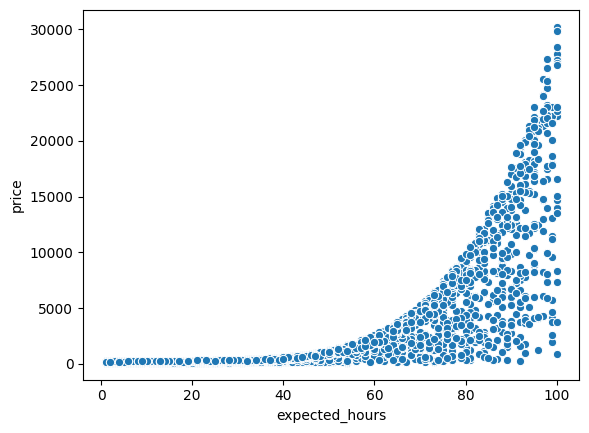

In [24]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y ="price", data =dados)


<Axes: xlabel='expected_hours', ylabel='price'>

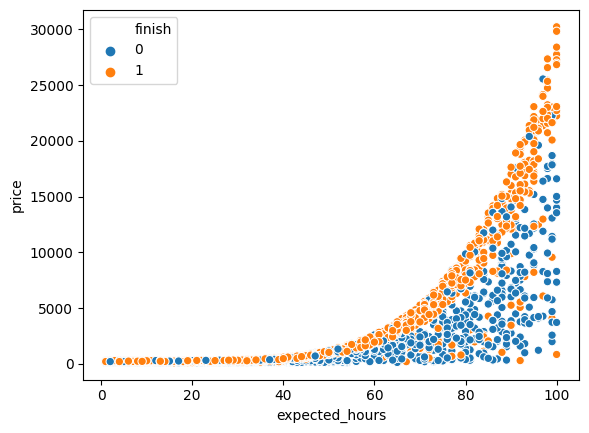

In [25]:
sns.scatterplot(x="expected_hours", y ="price",hue = "finish", data =dados)


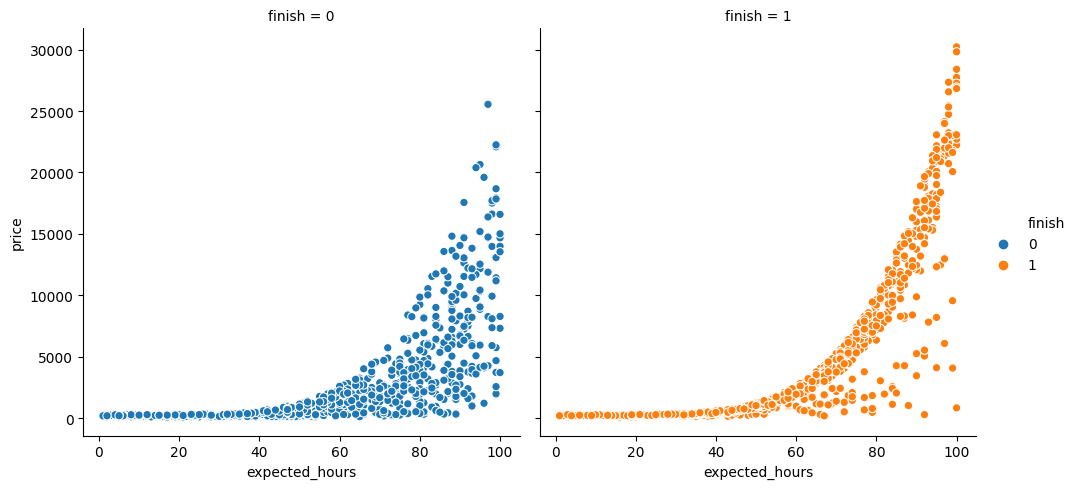

In [26]:
sns.relplot(x="expected_hours", y ="price",hue = "finish",col = "finish", data =dados)

#compara

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
x = dados [["expected_hours","price"]]
y = dados['finish']

SEED = 5

np.random.seed(SEED)
trein_x, teste_x, trein_y, teste_y =   train_test_split(x, y, test_size=0.25, stratify= y) # valor 0.25 indica que 25% dos dados serão separados para o conjunto de teste,
#enquanto os outros 75% serão utilizados para o conjunto de treino.

print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(trein_x, trein_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % accuracy) #usa separacoes aleatorias podendo dar um resultado cada vez diferente

#stratify = y, É útil quando temos um conjunto de dados desbalanceado, ou seja, quando uma classe tem muito mais amostras do que outra.
#A estratificação ajuda a garantir que as classes estejam representadas de forma equilibrada nos conjuntos de treino e teste

Treinos com 1617 elementos e testaremos com 540 elementos 
A acuracia foi 49.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
import numpy as np

previsoes_base = np.ones(540)
accuracy = accuracy_score(teste_y, previsoes_base) * 100
print("A acuracia do algoritmo de baseline %.2f%%" % accuracy)

#é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores.
#Devemos ser muito melhores que as porcentagens apresentadas na baseline, e
#por isso é muito importante que ele exista ainda que teste sempre a mesma classe

A acuracia do algoritmo de baseline 52.59%


<Axes: xlabel='expected_hours', ylabel='price'>

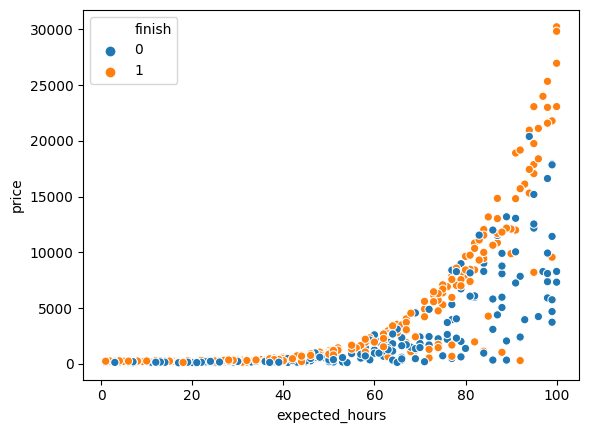

In [29]:
sns.scatterplot(x="expected_hours", y ="price",hue = teste_y, data =teste_x)


In [30]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()

y_min = teste_x.price.min()
y_max = teste_x.price.max()

print(x_min,x_max,y_min,y_max)

1 100 100 30223


In [31]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [32]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [33]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [34]:
Z = modelo.predict(pontos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [35]:
Z = modelo.predict(pontos)
Z.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [36]:
xx.shape

(100, 100)

In [37]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

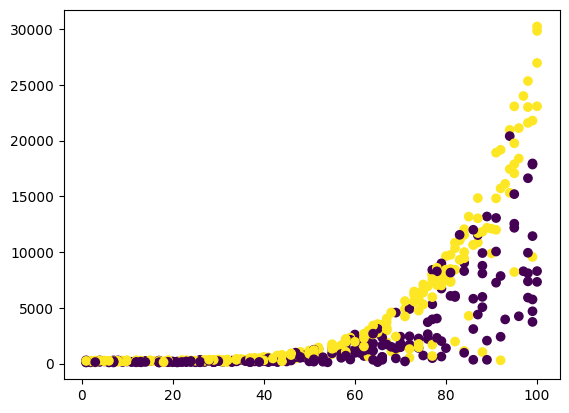

In [38]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y)


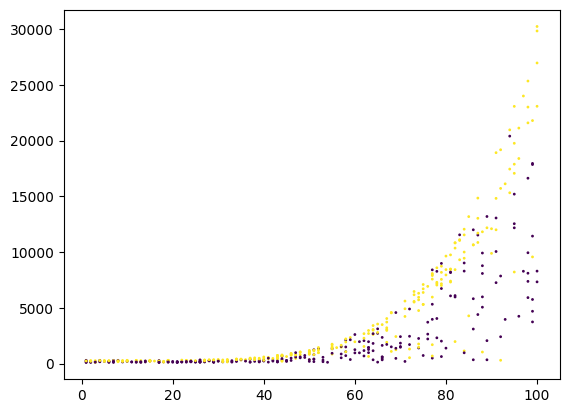

In [39]:
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1) #s = 1 diminui os pontos


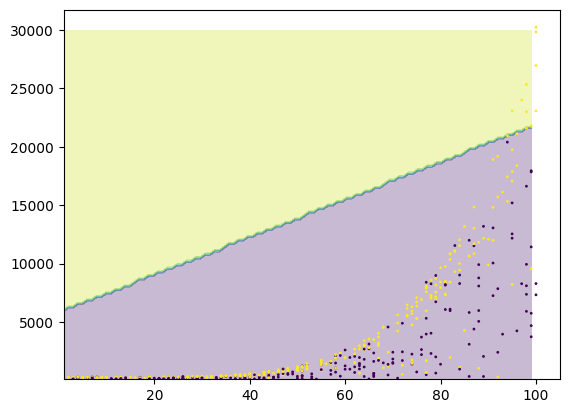

In [40]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1) #s = 1 diminui os pontos

#DECISION BOUNDARY

# Estimadores não lineares e support vector machine


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinos com 1617 elementos e testaremos com 540 elementos 
A acurácia foi 66.85%


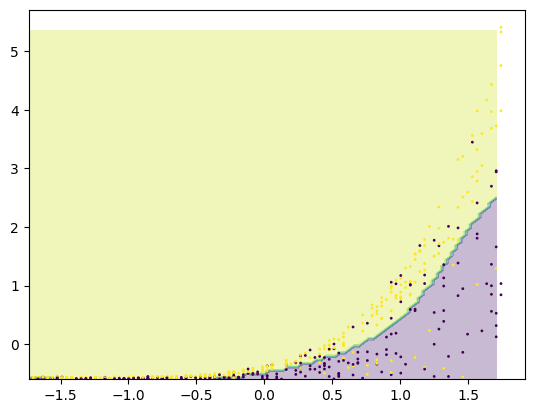

In [42]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

# arvores de decisao


In [43]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [44]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [45]:
a_trocar = {
    'no' : 0,
    'yes':1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [46]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [47]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [48]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np


SEED = 5

np.random.seed(SEED)
trein_x, teste_x, trein_y, teste_y =   train_test_split(x, y, test_size=0.25, stratify= y) # valor 0.25 indica que 25% dos dados serão separados para o conjunto de teste,
#enquanto os outros 75% serão utilizados para o conjunto de treino.

print("Treinos com %d elementos e testaremos com %d elementos " % (len(trein_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(trein_x, trein_y)
previsoes = modelo.predict(teste_x)

accuracy = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" % accuracy) #usa separacoes aleatorias podendo dar um resultado cada vez diferente

#stratify = y, É útil quando temos um conjunto de dados desbalanceado, ou seja, quando uma classe tem muito mais amostras do que outra.
#A estratificação ajuda a garantir que as classes estejam representadas de forma equilibrada nos conjuntos de treino e teste

Treinos com 1617 elementos e testaremos com 540 elementos 
A acuracia foi 49.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
#skelean ja existe um estimador que DummyClassifier
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)


A acurácia do dummy foi 49.26%


In [51]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)


A acurácia do dummy stratified foi 52.59%


In [52]:
#skelean ja existe um estimador que DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)


A acurácia do dummy mostfrequent foi 52.59%


In [76]:
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)



A acurácia do dummy stratified foi 52.59%


 uma das funções disponíveis nessas bibliotecas é o score, que retorna a acurácia do modelo


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 71.85%


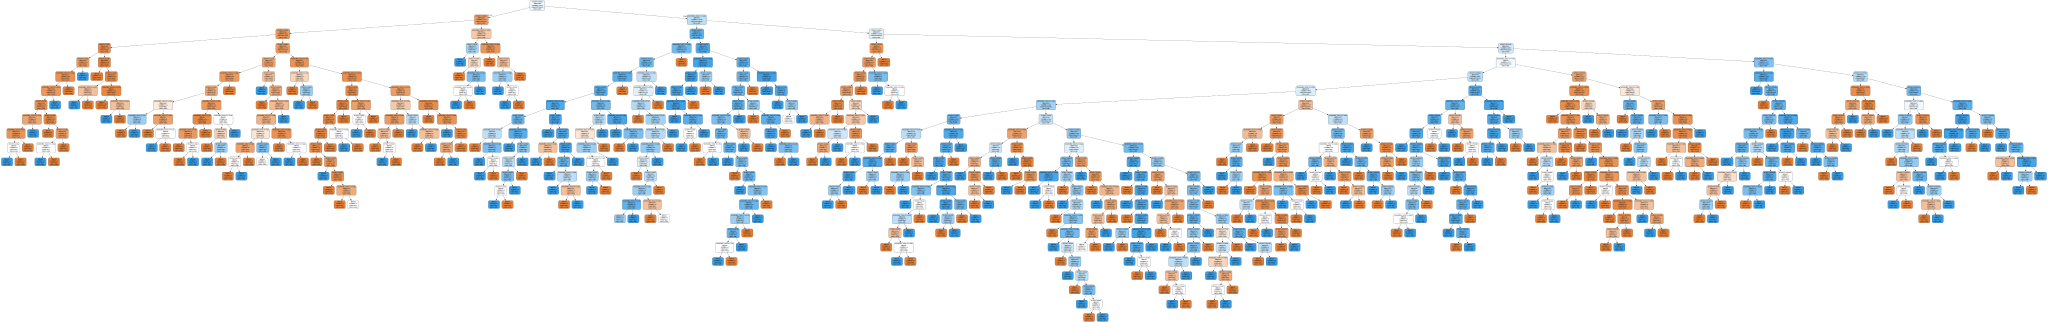

In [78]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico



In [79]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 68.33%
